In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.utils import ENVIRONMENT_TO_ALGORITHMS_MAP, ALGORITHMS_COLOR_MAP, ALGORITHMS_NAME_MAP

ENVIRONMENTS = ["MOSuperMarioBros-4-3-v2", "MOSuperMarioBros-3-2-v2", "MOSuperMarioBros-5-3-v2", "MOSuperMarioBros-3-3-v2"]
DOMAIN = "MOSuperMarioBrosZeroShot-v2"
ALGORITHMS = [
    'SAC Discrete Action',
    'PCN',
    'Envelope',
    'GPI-LS', 
]
ENVIRONMENT_TO_STAGE_MAP = {
    "MOSuperMarioBros-4-3-v2": "Stage 4-3",
    "MOSuperMarioBros-3-2-v2": "Stage 3-2",
    "MOSuperMarioBros-5-3-v2": "Stage 5-3",
    "MOSuperMarioBros-3-3-v2": "Stage 3-3 (Zero Shot)",
}
SEEDS = [5, 26, 47, 76, 92]

In [2]:
results = {}
for env in ENVIRONMENTS:
    results[env] = {}
    for algo in ALGORITHMS:
        results[env][algo] = []

for algo in ALGORITHMS:
    for seed in SEEDS:
        path = f"data/scores/{DOMAIN}/{algo}/seed_{seed}.csv"
        if os.path.exists(path):
            df = pd.read_csv(path)
            for env in ENVIRONMENTS:
                results[env][algo].append(df[f"NHGR/{env}"].values[0])

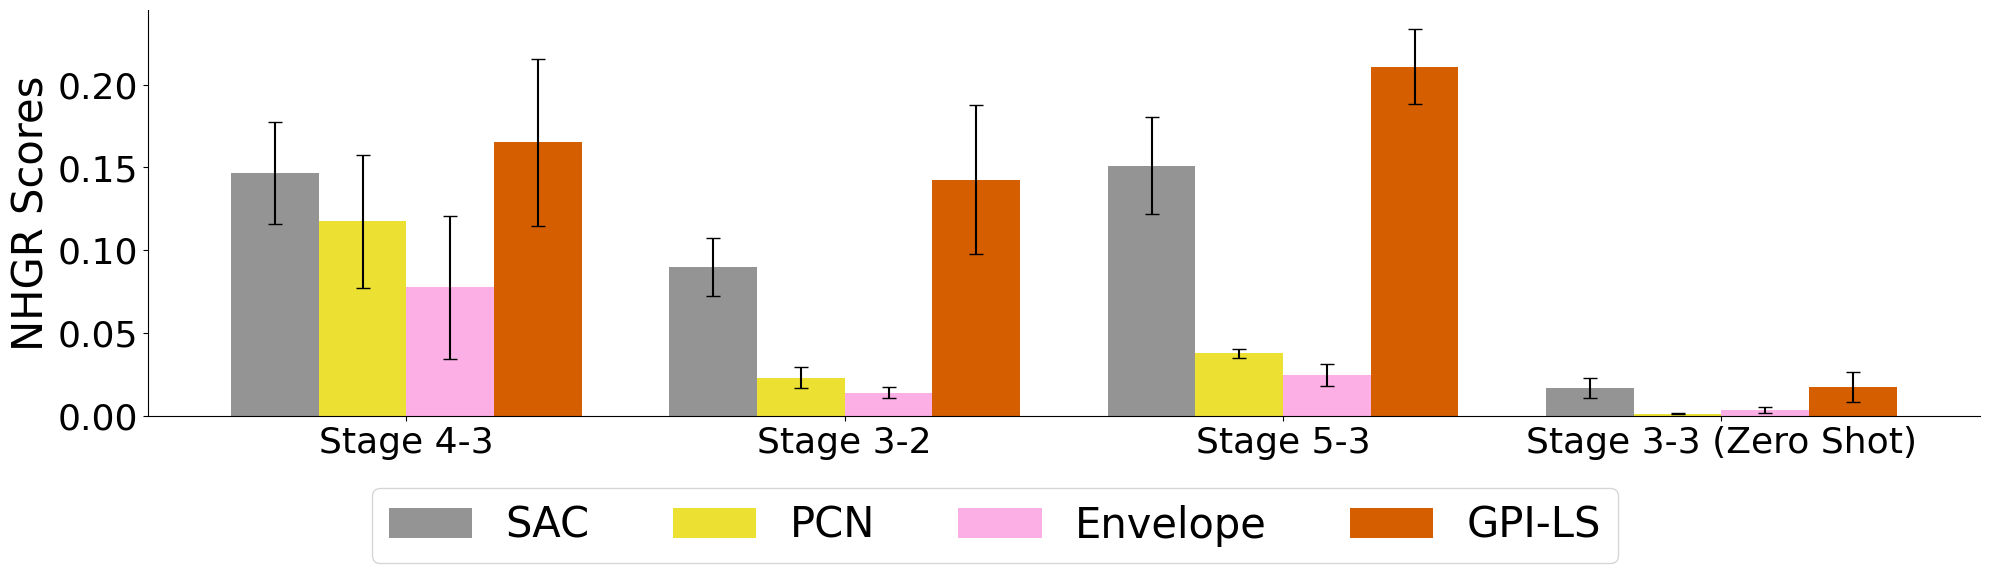

In [4]:
mean_scores = {}
std_errors = {}

for env in ENVIRONMENTS:
    mean_scores[env] = [np.mean(results[env][algo]) for algo in ALGORITHMS]
    std_errors[env] = [np.std(results[env][algo]) / np.sqrt(len(results[env][algo])) for algo in ALGORITHMS]

fig, ax = plt.subplots(figsize=(20, 6))
bar_width = 0.2
index = np.arange(len(ENVIRONMENTS))

# Plot bars for each algorithm within each environment
for i, algo in enumerate(ALGORITHMS):
    ax.bar(index + i * bar_width, [mean_scores[env][i] for env in ENVIRONMENTS], bar_width,
           label=ALGORITHMS_NAME_MAP[algo], yerr=[std_errors[env][i] for env in ENVIRONMENTS], capsize=5, 
           color=ALGORITHMS_COLOR_MAP[ALGORITHMS_NAME_MAP[algo]])

# Adding labels and title
ax.set_ylabel('NHGR Scores', fontsize=30)
ax.set_xticks(index + bar_width * (len(ALGORITHMS) - 1) / 2)
ax.set_xticklabels(ENVIRONMENT_TO_STAGE_MAP[env] for env in ENVIRONMENTS)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', labelsize=26)
ax.tick_params(axis='y', labelsize=26)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=30, ncol=len(ALGORITHMS))  # Increase fontsize

plt.tight_layout(rect=[0, 0.2, 1, 1])

plt.xticks(rotation=0)

plt.savefig(f'images/{DOMAIN}_zero_shot_performances.png', format='png', bbox_inches='tight')
plt.show()